In [29]:
import os
import urllib.request

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
data_path = "../data/"
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/11.%201D%20CNN%20Text%20Classification/dataset/intent_train_data.csv", filename=data_path + "intent_train_data.csv")
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/11.%201D%20CNN%20Text%20Classification/dataset/intent_test_data.csv", filename=data_path + "intent_test_data.csv")

train_data = pd.read_csv(data_path + 'intent_train_data.csv')
test_data = pd.read_csv(data_path + 'intent_test_data.csv')

print(train_data.head(3))
print(test_data.head(3))

                                             intent          label
0   add another song to the cita rom ntica playlist  AddToPlaylist
1  add clem burke in my playlist pre party r b jams  AddToPlaylist
2           add live from aragon ballroom to trapeo  AddToPlaylist
                                              intent          label
0  i 'd like to have this track onto my classical...  AddToPlaylist
1          add the album to my flow espa ol playlist  AddToPlaylist
2      add digging now to my young at heart playlist  AddToPlaylist


# Data Preprocessing

In [3]:
intent_train = train_data['intent'].to_list()
intent_test = test_data['intent'].to_list()
label_train = train_data['label'].to_list()
label_test = test_data['label'].to_list()

print(intent_train[:5])
print(intent_test[:5])
print(label_train[:5])
print(label_test[:5])

['add another song to the cita rom ntica playlist', 'add clem burke in my playlist pre party r b jams', 'add live from aragon ballroom to trapeo', 'add unite and win to my night out', 'add track to my digster future hits']
["i 'd like to have this track onto my classical relaxations playlist", 'add the album to my flow espa ol playlist', 'add digging now to my young at heart playlist', 'add this song by too poetic to my piano ballads playlist', 'add this album to old school death metal']
['AddToPlaylist', 'AddToPlaylist', 'AddToPlaylist', 'AddToPlaylist', 'AddToPlaylist']
['AddToPlaylist', 'AddToPlaylist', 'AddToPlaylist', 'AddToPlaylist', 'AddToPlaylist']


In [24]:
# label encoding
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(label_train)

label_train_seq = label_encoder.transform(label_train)
label_test_seq = label_encoder.transform(label_test)

In [25]:
# check label
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
print(dict(zip(intent_train[3000:3005], label_train_seq[3000:3005])))

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
{'i need a reservation in decaturville for six people': 1, 'book me a reservation for eight for the top rated bakery eleven hours from now in mango': 1, 'book a spot for ten at a restaurant with a spa in u s minor outlying islands': 1, 'book a reservation for seven people at a highly rated restaurant that serves moroccan food in east greenville': 1, 'book the light horse tavern for 4 people': 1}


# Tokenizing

In [26]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(intent_train)
intent_train_seq = tokenizer.texts_to_sequences(intent_train)
intent_test_seq = tokenizer.texts_to_sequences(intent_test)

print(tokenizer.word_index)

{'the': 1, 'a': 2, 'in': 3, 'to': 4, 'for': 5, 'of': 6, 'at': 7, 'i': 8, 'is': 9, 'book': 10, 'add': 11, 'what': 12, 'find': 13, 'my': 14, 'playlist': 15, 'this': 16, '6': 17, 'movie': 18, 'me': 19, 'rate': 20, 'weather': 21, 'and': 22, 'be': 23, 'show': 24, 'give': 25, 'restaurant': 26, 'out': 27, 'will': 28, 'it': 29, 'on': 30, 'current': 31, 'stars': 32, 'forecast': 33, 'points': 34, 'playing': 35, 'can': 36, 'table': 37, 'want': 38, 'like': 39, "'s": 40, 'movies': 41, 'from': 42, 'album': 43, 'now': 44, 'that': 45, 'need': 46, '1': 47, 'called': 48, 'one': 49, 'schedule': 50, 'are': 51, 'theatres': 52, 'with': 53, 'you': 54, 'please': 55, "'d": 56, '2': 57, 'house': 58, 'four': 59, 'time': 60, 'song': 61, 'reservation': 62, 'by': 63, '4': 64, '3': 65, 'where': 66, 'novel': 67, 'get': 68, 'rating': 69, 'put': 70, 'two': 71, 'three': 72, '5': 73, 'people': 74, 'animated': 75, 'five': 76, 'times': 77, 'schedules': 78, 'here': 79, 'films': 80, 'tune': 81, 'party': 82, 'saga': 83, 'tv':

In [27]:
vocab_size = len(tokenizer.word_index) + 1
print('vocab_size : ', vocab_size)

max_len = max(len(l) for l in intent_train_seq)
avg_len = sum(map(len, intent_train_seq)) / len(intent_train_seq)
print(max_len, avg_len)

vocab_size :  9870
35 9.364392396469789


In [28]:
intent_train_seq_pad = pad_sequences(intent_train_seq, maxlen=max_len)
intent_test_seq_pad = pad_sequences(intent_test_seq, maxlen=max_len)

label_train_seq_onehot = to_categorical(label_train_seq)
label_test_seq_onehot = to_categorical(label_test_seq)

print(intent_train_seq_pad.shape, label_train_seq_onehot.shape)
print(intent_test_seq_pad.shape, label_test_seq_onehot.shape)

(11784, 35) (11784, 6)
(600, 35) (600, 6)


In [31]:
# use validation set with shuffled data
X_train, X_val, y_train, y_val = train_test_split(intent_train_seq_pad, label_train_seq_onehot, test_size=0.1, random_state=777)
X_test = intent_test_seq_pad
y_test = label_test_seq_onehot

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(10605, 35) (10605, 6)
(1179, 35) (1179, 6)
(600, 35) (600, 6)


# Use Pretrained Word Embedding

In [36]:
# load GloVe
pretrained_word_embedding_path = "../model/"
f = open(os.path.join(pretrained_word_embedding_path + 'glove.6B.100d.txt'), encoding='utf-8')

embedding_dict = {}
for line in f:
    v = line.split()
    word = v[0]
    embedding = np.asarray(v[1:], dtype='float32')
    embedding_dict[word] = embedding
f.close()

print('%s word vectors.' % len(embedding_dict))
print(embedding_dict['hello'])

400000 word vectors.
[ 0.26688    0.39632    0.6169    -0.77451   -0.1039     0.26697
  0.2788     0.30992    0.0054685 -0.085256   0.73602   -0.098432
  0.5479    -0.030305   0.33479    0.14094   -0.0070003  0.32569
  0.22902    0.46557   -0.19531    0.37491   -0.7139    -0.51775
  0.77039    1.0881    -0.66011   -0.16234    0.9119     0.21046
  0.047494   1.0019     1.1133     0.70094   -0.08696    0.47571
  0.1636    -0.44469    0.4469    -0.93817    0.013101   0.085964
 -0.67456    0.49662   -0.037827  -0.11038   -0.28612    0.074606
 -0.31527   -0.093774  -0.57069    0.66865    0.45307   -0.34154
 -0.7166    -0.75273    0.075212   0.57903   -0.1191    -0.11379
 -0.10026    0.71341   -1.1574    -0.74026    0.40452    0.18023
  0.21449    0.37638    0.11239   -0.53639   -0.025092   0.31886
 -0.25013   -0.63283   -0.011843   1.377      0.86013    0.20476
 -0.36815   -0.68874    0.53512   -0.46556    0.27389    0.4118
 -0.854     -0.046288   0.11304   -0.27326    0.15636   -0.20334
  

In [37]:
# make embedding matrix with GloVe
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim)) # (vocab_size, embedding_dim)

for word, index in tokenizer.word_index.items():
    embedding_vector = embedding_dict.get(word)
    
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# Modeling

In [46]:
from keras.models import Model, load_model
from keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [41]:
# hyperparameters
# embedding_dim = 100
kernel_size = [2,3,5]
num_filters = 512
dropout_rate = 0.5

input = Input(shape=(max_len,)) # padded data length
embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim,input_length=max_len, weights=[embedding_matrix], trainable=False)(input)

convs = []
for size in kernel_size:
    conv = Conv1D(filters=num_filters, kernel_size=size, padding='valid', activation='relu', strides=1)(embedding)
    pool = GlobalMaxPooling1D()(conv)
    convs.append(pool)

output = Concatenate()(convs)
output = Dropout(rate=dropout_rate)(output)
output = Dense(units=len(label_encoder.classes_), activation='softmax')(output)

model = Model(inputs=input, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 35)]                 0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 35, 100)              987000    ['input_2[0][0]']             
                                                                                                  
 conv1d_3 (Conv1D)           (None, 34, 512)              102912    ['embedding_1[0][0]']         
                                                                                                  
 conv1d_4 (Conv1D)           (None, 33, 512)              154112    ['embedding_1[0][0]']         
                                                                                            

In [42]:
model_path = "../model/"
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint(filepath=model_path+"intent_with_glove.h5", monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, epochs=10, callbacks=[es, mc], batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
165/166 [============================>.] - ETA: 0s - loss: 0.2040 - accuracy: 0.9356
Epoch 1: val_accuracy improved from -inf to 0.97964, saving model to ../model/intent_with_glove.h5
166/166 [==============================] - 3s 15ms/step - loss: 0.2034 - accuracy: 0.9359 - val_loss: 0.0692 - val_accuracy: 0.9796
Epoch 2/10
  9/166 [>.............................] - ETA: 2s - loss: 0.0430 - accuracy: 0.9878

/Users/godpeny/Code/venv/laboratory/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


165/166 [============================>.] - ETA: 0s - loss: 0.0440 - accuracy: 0.9882
Epoch 2: val_accuracy did not improve from 0.97964
166/166 [==============================] - 3s 16ms/step - loss: 0.0440 - accuracy: 0.9881 - val_loss: 0.0509 - val_accuracy: 0.9796
Epoch 3/10
163/166 [============================>.] - ETA: 0s - loss: 0.0292 - accuracy: 0.9921
Epoch 3: val_accuracy improved from 0.97964 to 0.98304, saving model to ../model/intent_with_glove.h5
166/166 [==============================] - 3s 16ms/step - loss: 0.0300 - accuracy: 0.9920 - val_loss: 0.0519 - val_accuracy: 0.9830
Epoch 4/10
166/166 [==============================] - ETA: 0s - loss: 0.0208 - accuracy: 0.9941
Epoch 4: val_accuracy improved from 0.98304 to 0.98643, saving model to ../model/intent_with_glove.h5
166/166 [==============================] - 3s 17ms/step - loss: 0.0208 - accuracy: 0.9941 - val_loss: 0.0420 - val_accuracy: 0.9864
Epoch 5/10
165/166 [============================>.] - ETA: 0s - loss: 0.

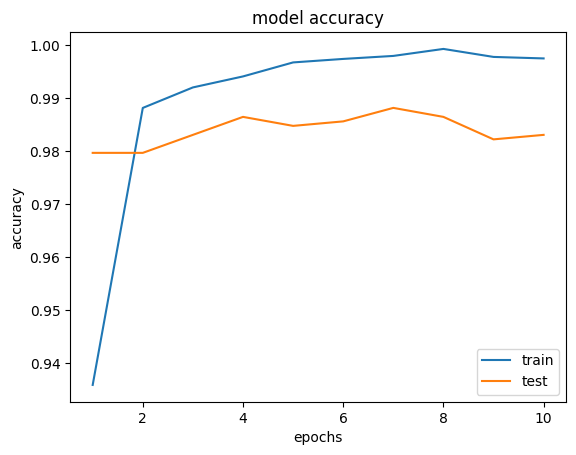

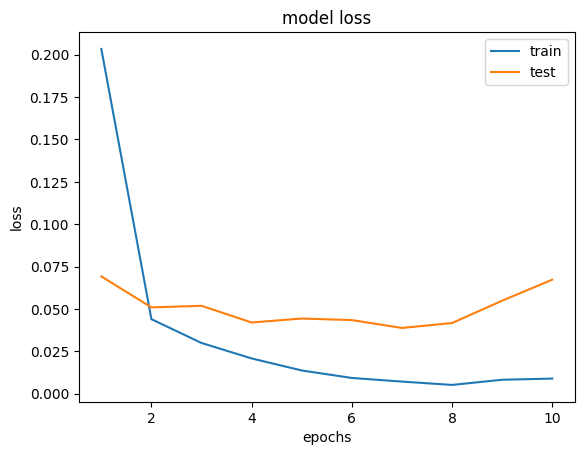

In [44]:
# see plot
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [47]:
# load model
loaded_model = load_model(model_path + 'intent_with_glove.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

19/19 [==============================] - 0s 5ms/step - loss: 0.0456 - accuracy: 0.9867

 테스트 정확도: 0.9867
